In [5]:
# Using Calendar

import numpy as np
import pandas as pd
import os
cwd = os.getcwd()

import seaborn as sn
import matplotlib.pyplot as plt

# Plots the figures in same place instead of a new window
%matplotlib inline

# Create DFs for holding 'calendar.csv' data
Bostondata = pd.read_csv(cwd+"//"+"Data//Boston//calendar.csv")
Seattledata = pd.read_csv(cwd+"//"+"Data//Seattle//calendar.csv")                         

In [6]:
Bostondata.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [7]:
Seattledata.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
# Splitting the date into year, month and day of the week for Boston data
calendarDF=pd.DataFrame()
calendarDF['year']=pd.to_datetime(Bostondata['date']).dt.year
calendarDF['month']=pd.to_datetime(Bostondata['date']).dt.month
calendarDF['dayofweek']=pd.to_datetime(Bostondata['date']).dt.dayofweek
calendarDF.head()

,year,month,dayofweek
0,2017,9,1
1,2017,9,0
2,2017,9,6
3,2017,9,5
4,2017,9,4


In [11]:
# Splitting the date into year, month and day of the week for Seattle data
calendarDF=pd.DataFrame()
calendarDF['year']=pd.to_datetime(Seattledata['date']).dt.year
calendarDF['month']=pd.to_datetime(Seattledata['date']).dt.month
calendarDF['dayofweek']=pd.to_datetime(Seattledata['date']).dt.dayofweek
calendarDF.head()

,year,month,dayofweek
0,2016,1,0
1,2016,1,1
2,2016,1,2
3,2016,1,3
4,2016,1,4


In [12]:
# Joining DF holding the split date to our original DF
newBostondata=Bostondata.join(calendarDF,on=None,how='left',sort=False)
newSeattledata=Seattledata.join(calendarDF,on=None,how='left',sort=False)

In [13]:
#Replacing $ in price with ' '
newBostondata['price']=newBostondata['price'].str.replace('$','')
newBostondata['price']=pd.to_numeric(newBostondata['price'],errors='coerce')

newSeattledata['price']=newSeattledata['price'].str.replace('$','')
newSeattledata['price']=pd.to_numeric(newSeattledata['price'],errors='coerce')

In [42]:
# Replacing ',' in price with '.'
if newBostondata.price.dtype != np.float64:
    newBostondata.price = newBostondata.price.map(lambda p : float(p[1:-3].replace(',','')))
newBostondata.price.describe()

count    640469.00000
mean        192.45391
std         140.55155
min          11.00000
25%          85.00000
50%         150.00000
75%         250.00000
max         999.00000
Name: price, dtype: float64

In [43]:
boston_price_month=newBostondata[['month','price']]
seattle_price_month=newSeattledata[['month','price']]

boston_mean=boston_price_month.groupby('month').mean()
seattle_mean=seattle_price_month.groupby('month').mean()

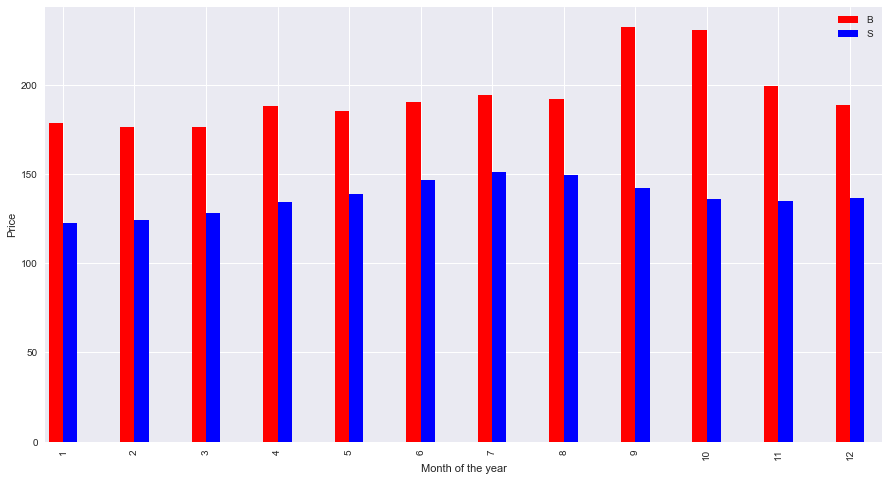

In [44]:
#PLotting bar graph showing comparison based on price vs month of the year

fig = plt.figure(figsize=(15,8)) 

ax1 = fig.add_subplot(111) 
ax2 = fig.add_subplot(111) 
width = 0.2

boston_mean.plot(kind='bar', color='red', ax=ax1, width=width, position=1)
seattle_mean.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax1.set_ylabel('Price')
ax1.set_xlabel('Month of the year')
ax1.legend('BS')